In [1]:
import cv2
import os

In [38]:
def generate_dataset(name):
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.1, 9)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face

    cap = cv2.VideoCapture(-1)
    img_id = 0

    os.mkdir("data/"+name)

    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            
            file_name_path = "data/"+name+"/"+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )
            
            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1)==13 or int(img_id)==100:
                break
                
    cap.release()
    cv2.destroyAllWindows()

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_2176/3783814370.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [3]:
generate_dataset("lahcen")

NameError: name 'generate_dataset' is not defined

In [2]:
from random import shuffle
import numpy as np

In [3]:
def code_lable(directories):
    nb= len(directories)
    return np.identity(nb).astype(int)


In [4]:
code_lables=[]
labels = os.listdir("data")
def dataSet():
    data=[]
    code_lables=code_lable(labels)
    print(labels)
    print(code_lables)
    index_lable=0
    for folder in labels:
        for img in os.listdir(os.path.join("data",folder)):
            img_data = cv2.imread(os.path.join("data",folder,img), cv2.IMREAD_GRAYSCALE)
            img_data = cv2.resize(img_data, (50,50))
            data.append([np.array(img_data), code_lables[index_lable]])
        index_lable=index_lable+1
    shuffle(data)  
    return data

In [5]:
data = dataSet()

['issam', 'fouad']
[[1 0]
 [0 1]]


In [6]:
print(len(data))
data = dataSet()
print(int(len(data)*0.8))
train = data[:int(len(data)*0.8)]  
test = data[int(len(data)*0.8):]
#for t in test:
#    print(t[1])
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train = [i[1] for i in train]

X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)

y_test = [i[1] for i in test]

200
['issam', 'fouad']
[[1 0]
 [0 1]]
160
(160, 50, 50, 1)
(40, 50, 50, 1)


In [7]:
import tensorflow as tf
from tensorflow.python.framework import ops
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


2023-01-04 19:26:26.572501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 19:26:27.225814: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/elbf/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-04 19:26:27.225841: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-04 19:26:28.805911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
ops.reset_default_graph()

# tf.reset_default_graph()
convnet = input_data(shape=[50,50,1])

convnet = conv_2d(convnet, 32, 5, activation='relu')
# 32 filters and stride=5 so that the filter will move 5 pixel or unit at a time
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

#convnet = conv_2d(convnet, 32, 5, activation='relu')
#convnet = max_pool_2d(convnet, 5)



convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 512, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')

convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy')

model = tflearn.DNN(convnet, tensorboard_verbose=1)

model.fit(X_train, y_train, n_epoch=20, validation_set=(X_test, y_test), show_metric = True, run_id="FRS" )

#model.save("my_model.tflearn")


Training Step: 59  | total loss: 0.00043 | time: 0.146s
| Adam | epoch: 020 | loss: 0.00043 - acc: 0.9999 -- iter: 128/160
Training Step: 60  | total loss: 1.05255 | time: 1.208s
| Adam | epoch: 020 | loss: 1.05255 - acc: 0.9296 | val_loss: 0.00007 - val_acc: 1.0000 -- iter: 160/160
--


<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_2527/1479739304.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


[[0.7319826  0.26801747]]
0
issam


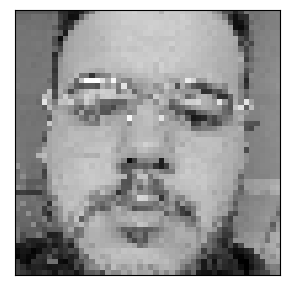

In [21]:
#model.load("my_model.tflearn")
import matplotlib.pyplot as plt

face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

def face_cropped(img):
    faces = face_classifier.detectMultiScale(img, 1.1, 9)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h,x:x+w]
    return cropped_face

fig = plt.figure(figsize=(20,20))
y = fig.add_subplot(5,5, 1)

img_data = cv2.imread("img.jpeg", cv2.IMREAD_GRAYSCALE)
#img_data = cv2.resize(img_data, (50,50))
img_data = cv2.resize(face_cropped(img_data), (50,50))

y.imshow(img_data, cmap='gray')
y.axes.get_xaxis().set_visible(False)
y.axes.get_yaxis().set_visible(False)
#img = cv2.imread("img2.png", cv2.IMREAD_GRAYSCALE)
#face = cv2.resize(face_cropped(img), (200,200))
#face = cv2.resize(face, (50,50))
#cv2.imshow("image",face)

#cv2.waitKey(0)



pred = model.predict([np.array(img_data).reshape(50,50,1)])
print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)])
